In [131]:
import cv2
import numpy as np
import pickle
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Camera Calibration
Each camera needs a unique caliration even cameras from the same model and brand  
Calibrating cameras by finding camera matrix and distortion coeffs


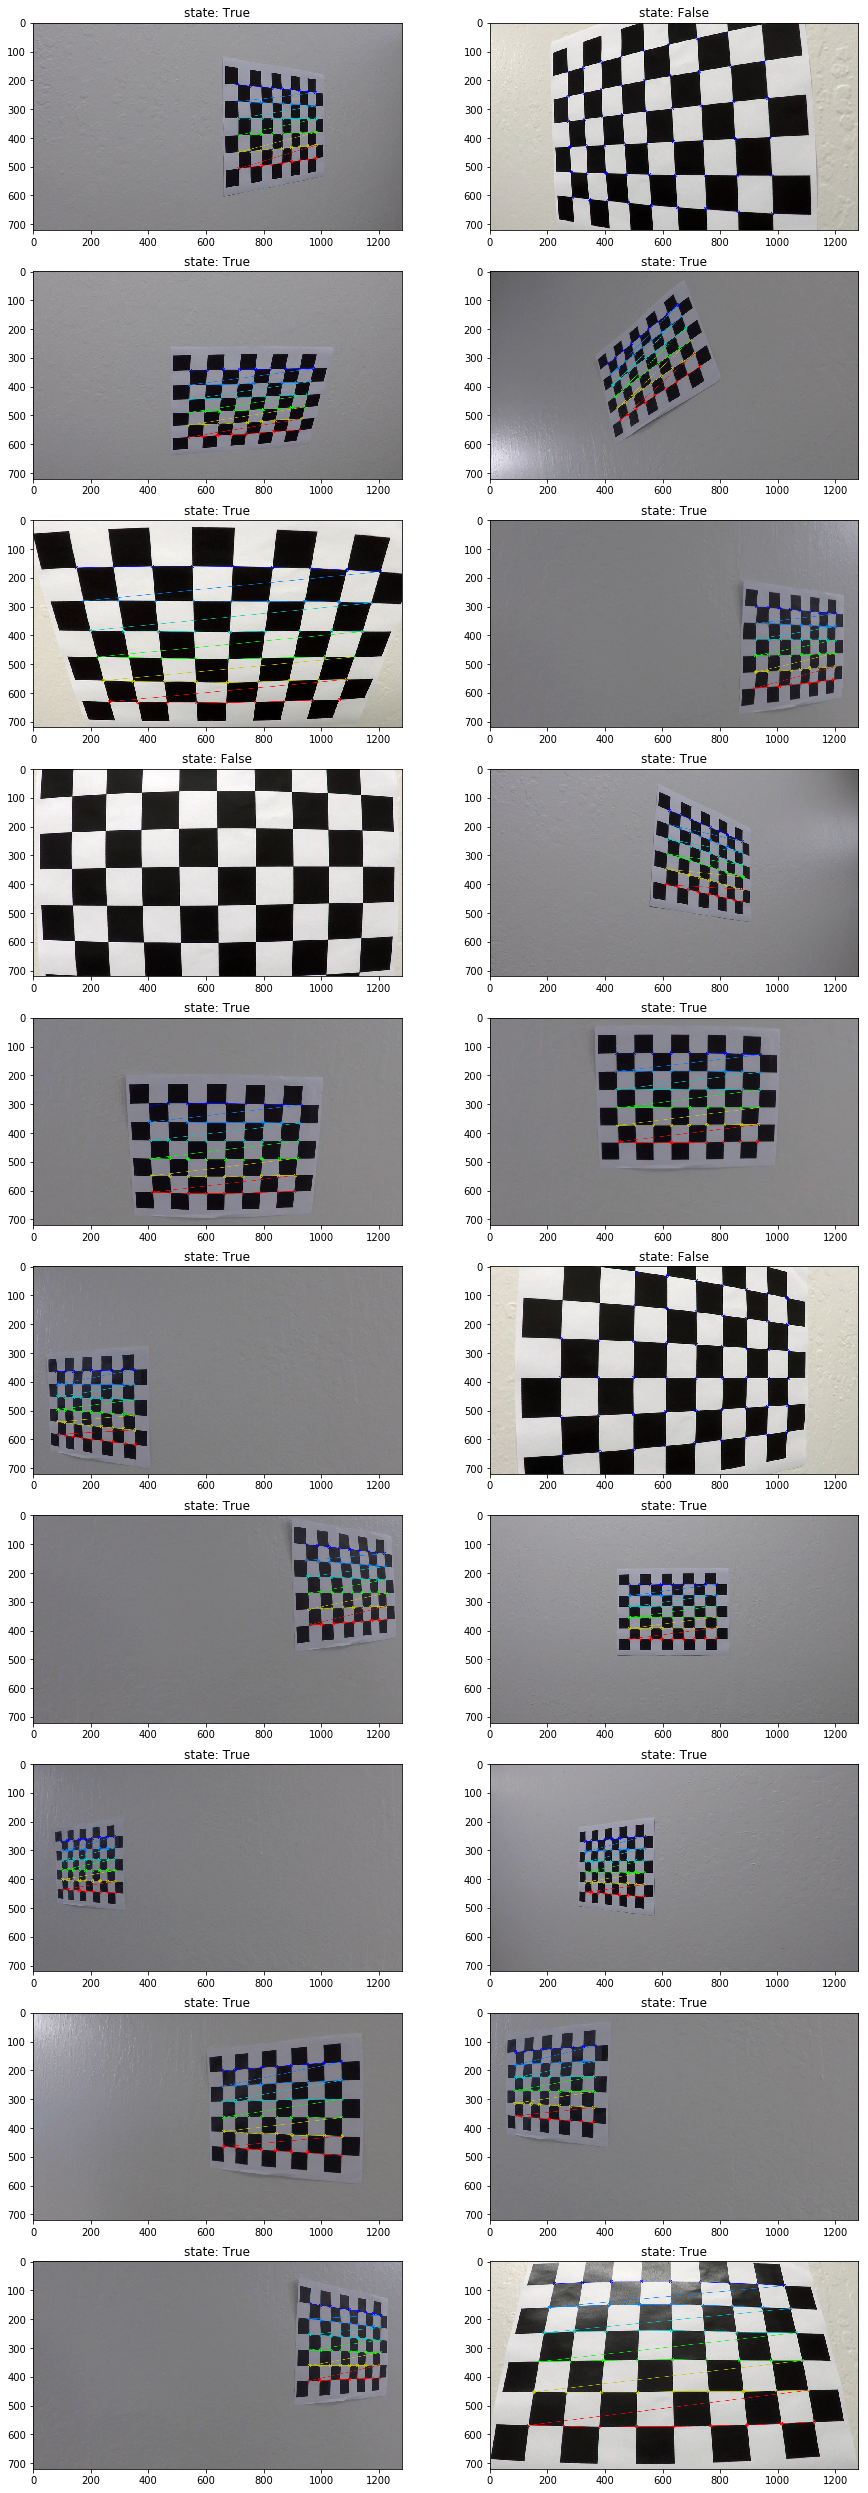

In [125]:
fig = plt.figure(figsize=(15, 45))
imgsPaths = glob("./camera_cal/*.jpg")
for i, imgPath in enumerate(imgsPaths):
    img = plt.imread(imgPath)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)
    cv2.drawChessboardCorners(img, (9, 6), corners, ret)
    axis = fig.add_subplot(len(imgsPaths)//2, 2, i+1)
    axis.imshow(img)
    axis.set_title("state: "+str(ret))

In [127]:
# objPoints: 3d object points, imgPoints: 2d image points:
objPoints = np.zeros((9*6, 3), np.float32)
# get indecies of each point in a given 2d-grid size 
objPoints[:, :2] = np.mgrid[:9, :6].T.reshape(-1, 2)
objPoints.shape

(54, 3)

In [142]:
allObjPoints = []
allImgPoints = []
for imgPath in glob("./camera_cal/*.jpg"):
    rgbImg = plt.imread(imgPath)
    grayImg = cv2.cvtColor(rgbImg, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(grayImg, (9, 6), None)
    print(imgPath + ": " + str(ret))
    if ret:
        allObjPoints.append(objPoints)
        allImgPoints.append(corners)
    
ret, camMtx, dstCoeffs, redVecs, tanVecs = cv2.calibrateCamera(allObjPoints, allImgPoints, (1200, 720), None, None)
with open("camCalibMatCoeffs", "wb") as wf:
    pickle.dump(dict(camMtx=camMtx, dstCoeffs=dstCoeffs), wf)
    print("saved camera matrix, distortion coeffs successfully!")
len(allObjPoints), len(allImgPoints)

./camera_cal/calibration8.jpg: True
./camera_cal/calibration4.jpg: False
./camera_cal/calibration10.jpg: True
./camera_cal/calibration13.jpg: True
./camera_cal/calibration2.jpg: True
./camera_cal/calibration15.jpg: True
./camera_cal/calibration1.jpg: False
./camera_cal/calibration9.jpg: True
./camera_cal/calibration17.jpg: True
./camera_cal/calibration18.jpg: True
./camera_cal/calibration20.jpg: True
./camera_cal/calibration5.jpg: False
./camera_cal/calibration16.jpg: True
./camera_cal/calibration6.jpg: True
./camera_cal/calibration11.jpg: True
./camera_cal/calibration7.jpg: True
./camera_cal/calibration12.jpg: True
./camera_cal/calibration19.jpg: True
./camera_cal/calibration14.jpg: True
./camera_cal/calibration3.jpg: True
saved camera matrix, distortion coeffs successfully!


(17, 17)

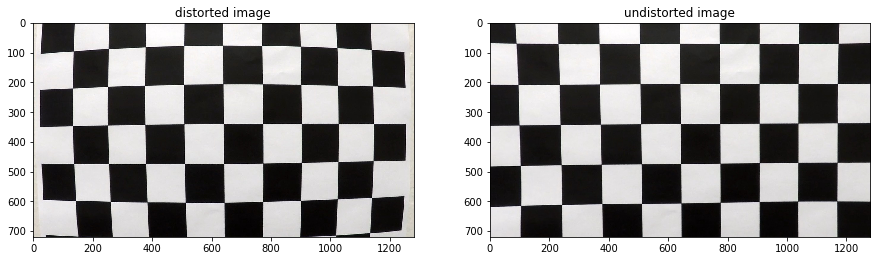

In [144]:
with open("camCalibMatCoeffs", "rb") as rf:
    camModel = pickle.load(rf)
    camMtx = camModel["camMtx"]
    dstCoeffs = camModel["dstCoeffs"]
    
fig = plt.figure(figsize=(15, 15))
img = plt.imread("./camera_cal/calibration1.jpg")
dstImg = cv2.undistort(img, camMtx, dstCoeffs, None, camMtx)
axis = fig.add_subplot(1, 2, 1)
axis.set_title("distorted image")
axis.imshow(img)
axis = fig.add_subplot(1, 2, 2)
axis.set_title("undistorted image")
axis.imshow(dstImg)